In [13]:
from tensorflow import keras

In [14]:
# Importing all necessary libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K 
    
img_width, img_height = 224, 224

In [15]:
train_data_dir = 'v_data/train'
validation_data_dir = 'v_data/test'
nb_train_samples = 400
nb_validation_samples = 100
epochs = 3
batch_size = 16

In [16]:
"""
This part is to check the data format i.e the RGB channel is coming first or last so, 
whatever it may be, the model will check first and then input shape will be fed accordingly. 
"""
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [17]:
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [18]:

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [19]:
train_datagen = ImageDataGenerator()
 
test_datagen = ImageDataGenerator()
 
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')


Found 400 images belonging to 2 classes.


In [20]:
 
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
 


Found 100 images belonging to 3 classes.


In [21]:
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/3
25/25 [==============================] - 14s 515ms/step - loss: 52.0825 - accuracy: 0.5425 - val_loss: 9.5312 - val_accuracy: 0.0000e+00
Epoch 2/3
25/25 [==============================] - 12s 484ms/step - loss: 0.8072 - accuracy: 0.6575 - val_loss: 1.5183 - val_accuracy: 0.1250
Epoch 3/3
25/25 [==============================] - 12s 495ms/step - loss: 0.5229 - accuracy: 0.7025 - val_loss: 1.4981 - val_accuracy: 0.1354


In [30]:

from tensorflow.keras.preprocessing.image import load_img
image = load_img('v_data/test/cars/23.jpg', target_size=(224, 224))



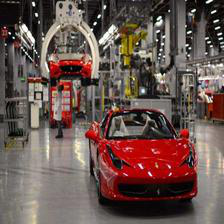

In [31]:
image

In [33]:
import numpy as np
img = np.array(image)


In [80]:
img

array([[[ 18,  15,  10],
        [ 13,  10,   5],
        [ 16,  13,   8],
        ...,
        [ 20,  15,  12],
        [ 24,  19,  16],
        [ 27,  22,  19]],

       [[ 23,  20,  15],
        [ 43,  40,  35],
        [ 66,  63,  58],
        ...,
        [ 26,  21,  18],
        [ 25,  20,  17],
        [ 24,  19,  16]],

       [[ 23,  20,  15],
        [ 34,  31,  26],
        [ 48,  45,  40],
        ...,
        [ 18,  13,  10],
        [ 21,  16,  13],
        [ 25,  20,  17]],

       ...,

       [[ 99,  95,  96],
        [101,  97,  98],
        [106, 102, 101],
        ...,
        [104, 103,  98],
        [103, 103,  95],
        [102, 102,  94]],

       [[100,  96,  97],
        [102,  98,  99],
        [106, 102, 101],
        ...,
        [103, 102,  97],
        [103, 103,  95],
        [103, 103,  95]],

       [[ 98,  94,  95],
        [101,  97,  98],
        [105, 101, 100],
        ...,
        [105, 104,  99],
        [106, 106,  98],
        [106, 106,  98]]

In [34]:
img.shape

(224, 224, 3)

In [38]:
img = img.reshape(1,224,224,3)


In [39]:
img

array([[[[ 18,  15,  10],
         [ 13,  10,   5],
         [ 16,  13,   8],
         ...,
         [ 20,  15,  12],
         [ 24,  19,  16],
         [ 27,  22,  19]],

        [[ 23,  20,  15],
         [ 43,  40,  35],
         [ 66,  63,  58],
         ...,
         [ 26,  21,  18],
         [ 25,  20,  17],
         [ 24,  19,  16]],

        [[ 23,  20,  15],
         [ 34,  31,  26],
         [ 48,  45,  40],
         ...,
         [ 18,  13,  10],
         [ 21,  16,  13],
         [ 25,  20,  17]],

        ...,

        [[ 99,  95,  96],
         [101,  97,  98],
         [106, 102, 101],
         ...,
         [104, 103,  98],
         [103, 103,  95],
         [102, 102,  94]],

        [[100,  96,  97],
         [102,  98,  99],
         [106, 102, 101],
         ...,
         [103, 102,  97],
         [103, 103,  95],
         [103, 103,  95]],

        [[ 98,  94,  95],
         [101,  97,  98],
         [105, 101, 100],
         ...,
         [105, 104,  99],
        

In [40]:
label = model.predict(img)


In [41]:
label

array([[0.00020939]], dtype=float32)

In [42]:
if label[0][0]>=0.5:
    print("plane")
else:
    print("car")

car


In [49]:

 
image = load_img('v_data/test/testingimg.jpg', target_size=(224, 224))


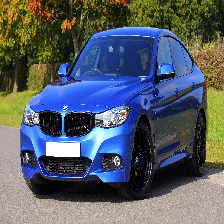

In [50]:
image

In [51]:
img = np.array(image)


In [52]:
img = img.reshape(1,224,224,3)


In [53]:
label = model.predict(img)


In [54]:
label

array([[1.1473553e-06]], dtype=float32)

In [55]:
if label[0][0]<0.5:
    print("car")
else:
    print("plane")

car


In [47]:

 
image = load_img('v_data/test/planes/15.jpg', target_size=(224, 224))
img = np.array(image)
img = img.reshape(1,224,224,3)
label = model.predict(img)
if label[0][0]<0.5:
    print("car")
else:
    print("plane")

plane


In [48]:
label

array([[0.6749867]], dtype=float32)

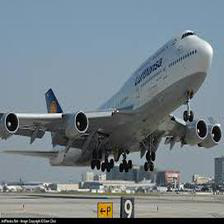

In [46]:
image

In [59]:
for i in range(1,31):
    image = load_img('v_data/test/planes/'+str(i)+'.jpg', target_size=(224, 224))
    img = np.array(image)
    img = img.reshape(1,224,224,3)
    label = model.predict(img)
    if label[0][0]<0.5:
        print("car")
    else:
        print("plane")

plane
car
plane
plane
plane
car
plane
plane
plane
plane
plane
plane
plane
plane
plane
plane
plane
plane
plane
plane
plane
plane
plane
plane
plane
plane
plane
plane
plane
plane
